Link for course page - https://jovian.com/learn/nautral-language-processing-zero-to-nlp/lesson/neural-networks-and-deep-learning  
Link for video - https://www.youtube.com/watch?v=1LyoAVX6mKU

# Neural Networks and Embeddings for Natural Language Processing

Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification

# 1 - Download the Data

In [2]:
import os
import zipfile

zip_file_path = 'quora-insincere-questions-classification.zip'
data_directory = 'quora-insincere-questions-classification-data'

# Create the directory
os.makedirs(data_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_directory)

In [79]:
import pandas as pd

train_fname = os.path.join(data_directory, 'train.csv')
test_fname = os.path.join(data_directory, 'test.csv')
submission_fname = os.path.join(data_directory, 'sample_submission.csv')

raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
submission_df = pd.read_csv(submission_fname)

In [80]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [83]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [85]:
submission_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [87]:
sample_df = raw_df.sample(100_000, random_state=68)
sample_df

,qid,question_text,target
1033963,ca9b47b0ee93ca5dc7d6,I called a guy as best friend. He tells me not...,0
1014249,c6c11202208df9616589,How does a photon transfer energy to an electron?,0
1060672,cfd46c1aac13292ae81e,Why am I vomiting small amounts of blood?,0
999784,c3ece95fc29a3104b01c,"If God exists, why doesn't he tell me?",0
1188396,e8e1cc4c607c4f90e72b,How does OpenStack RCA engine (Vitrage) work?,0
...,...,...,...
1304919,ffc465a6aa0daf762cc6,Why do many people are prone to mediocrity?,0
1203860,ebf5707f6a3b62f38522,What traditions of European nations that are b...,0
625974,7a94b5bf3b0b6e5f2590,Should I train to be a programmer?,0
125912,18a4a23498fc737c3a6b,Can a higher cholestrol level (ldl cholestrol)...,0


# 2 - Prepare Data for Training

## 2.1 - Conversion to TF-IDF Vectors

In [91]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
stemmer = SnowballStemmer(language='english')

def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]

In [97]:
tokenize("Ain't nothin' (but a heartache)!")

['ai', "n't", 'nothin', "'", '(', 'but', 'a', 'heartach', ')', '!']

In [99]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [101]:
english_stopwords = stopwords.words('english')

In [103]:
vectorizer = TfidfVectorizer(lowercase=True, 
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1_000)

In [105]:
%%time
vectorizer.fit(sample_df.question_text)

D:\conda\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
D:\conda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: total: 14.6 s
Wall time: 14.6 s


TfidfVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x000001759103CCC0>)

In [106]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: total: 14.9 s
Wall time: 15 s


In [107]:
inputs.shape

(100000, 1000)

In [108]:
targets = sample_df.target.values

In [109]:
targets.shape

(100000,)

In [110]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: total: 56.8 s
Wall time: 57.1 s


In [111]:
test_inputs.shape

(375806, 1000)

## 2.2 - Split training and validation set

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3, random_state=68)

In [115]:
train_inputs.shape, val_inputs.shape

((70000, 1000), (30000, 1000))

In [116]:
train_targets.shape

(70000,)

## 2.3 - Convert to PyTorch Tensors

In [118]:
pip install torch torchvision torchaudio

In [119]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [120]:
train_tensors = F.normalize(torch.tensor(train_inputs.toarray()).float(), dim=0)
val_tensors = F.normalize(torch.tensor(val_inputs.toarray()).float(), dim=0)

In [121]:
train_tensors.shape, val_tensors.shape

(torch.Size([70000, 1000]), torch.Size([30000, 1000]))

In [122]:
train_ds = TensorDataset(train_tensors, torch.tensor(train_targets))
val_ds = TensorDataset(val_tensors, torch.tensor(val_targets))

In [123]:
batch_size = 128
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size)

In [124]:
for inputs_batch, targets_batch in train_dl:
    print('inputs.shape', inputs_batch.shape)
    print('targets.shape', targets_batch.shape)
    print(targets_batch)
    break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


# 3 - Logistic Regression Model

In [126]:
import torch.nn as nn

In [127]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 1)
        
    def forward(self, xb):
        out = self.linear1(xb)
        return out

In [128]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [129]:
logreg_model = LogReg()

In [130]:
for batch in val_dl:
    batch_inputs, batch_targets = batch
    print('inputs.shape', batch_inputs.shape)
    print('targets', batch_targets)
    
    batch_out = logreg_model(batch_inputs)
    probs = torch.sigmoid(batch_out[:,0])
    preds = (probs >= 0.5).int()
    
    print('outputs', preds)
    print('accuracy', accuracy_score(batch_targets, preds))
    print('f1_score', f1_score(batch_targets, preds))
    break

inputs.shape torch.Size([128, 1000])
targets tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0])
outputs tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
accuracy 0.921875
f1_score 0.0


In [132]:
def evaluate(model, dl):
    losses, accs, f1s = [], [], []
    for batch in dl:
        inputs, targets = batch
        out = model(inputs)
        
        probs = torch.sigmoid(out[:,0])
        loss = F.binary_cross_entropy(probs, targets.float(), weight=torch.tensor(20.))
        losses.append(loss.item())

        preds = (probs > 0.5).int()
        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)
        
        accs.append(acc)
        f1s.append(f1)

    return np.mean(losses), np.mean(accs), np.mean(f1s)

In [137]:
def fit(epochs, lr, model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            inputs, targets = batch
            out = model(inputs)
            probs = torch.sigmoid(out[:,0])
            loss = F.binary_cross_entropy(probs, 
                                          targets.float(), 
                                          weight=torch.tensor(20.))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        loss, acc, f1 = result
        print('Epoch: {}; Loss: {:.4f}; Accuracy: {:.4f}; F1 Score: {:.4f}'.format(
            epoch, loss, acc, f1))
        history.append(result)

    return history

In [138]:
logreg_model = LogReg()

In [139]:
history = [evaluate(logreg_model, val_dl)]

In [140]:
history

[(13.719994200036881, 0.9386081560283689, 0.0)]

In [141]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 4.3659; Accuracy: 0.9386; F1 Score: 0.0000
Epoch: 1; Loss: 4.0398; Accuracy: 0.9386; F1 Score: 0.0000
Epoch: 2; Loss: 3.7761; Accuracy: 0.9386; F1 Score: 0.0000
Epoch: 3; Loss: 3.5697; Accuracy: 0.9389; F1 Score: 0.0092
Epoch: 4; Loss: 3.4123; Accuracy: 0.9396; F1 Score: 0.0373


In [142]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 3.2971; Accuracy: 0.9413; F1 Score: 0.1152
Epoch: 1; Loss: 3.2094; Accuracy: 0.9425; F1 Score: 0.1786
Epoch: 2; Loss: 3.1521; Accuracy: 0.9436; F1 Score: 0.2404
Epoch: 3; Loss: 3.1091; Accuracy: 0.9445; F1 Score: 0.2914
Epoch: 4; Loss: 3.1080; Accuracy: 0.9443; F1 Score: 0.3392


In [143]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 3.0866; Accuracy: 0.9441; F1 Score: 0.3587
Epoch: 1; Loss: 3.0891; Accuracy: 0.9449; F1 Score: 0.3868
Epoch: 2; Loss: 3.0701; Accuracy: 0.9451; F1 Score: 0.3982
Epoch: 3; Loss: 3.0929; Accuracy: 0.9442; F1 Score: 0.4149
Epoch: 4; Loss: 3.0578; Accuracy: 0.9443; F1 Score: 0.4123


In [144]:
losses = [item[0] for item in history]

In [145]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss')

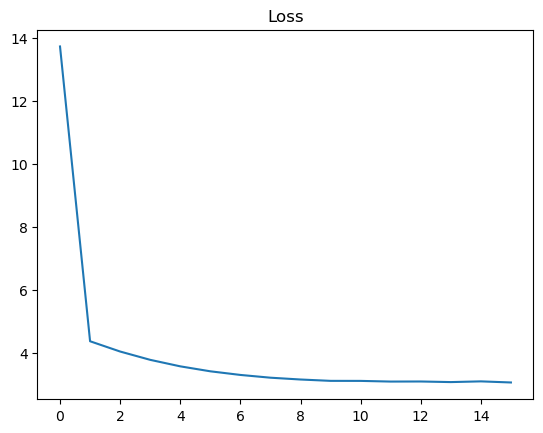

In [146]:
plt.plot(losses);
plt.title('Loss')

In [147]:
f1s = [item[2] for item in history]

Text(0.5, 1.0, 'F1 Score')

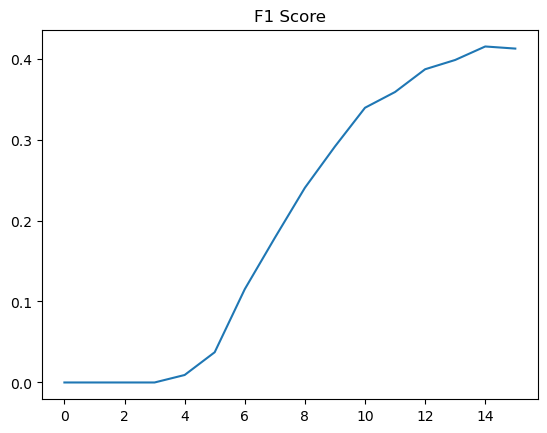

In [148]:
plt.plot(f1s)
plt.title('F1 Score')

# 4 - Feed Forward Neural Network

In [174]:
import torch.nn.functional as F

In [176]:
class FeedForwardModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 1)
        
    def forward(self, xb):
        out = F.relu(self.linear1(xb))
        out = F.relu(self.linear2(out))
        out = F.relu(self.linear3(out))
        out = self.linear4(out)
        return out

In [185]:
ff_model = FeedForwardModel()

In [187]:
history = [evaluate(ff_model, val_dl)]


In [189]:
history

[(14.18750817724999, 0.0613918439716312, 0.11494603433449062)]

In [191]:
%%time
history += fit(5, 0.001, ff_model, train_dl, val_dl)

Epoch: 0; Loss: 3.2562; Accuracy: 0.9356; F1 Score: 0.4529
Epoch: 1; Loss: 3.2024; Accuracy: 0.9367; F1 Score: 0.4789
Epoch: 2; Loss: 3.5283; Accuracy: 0.9274; F1 Score: 0.4913
Epoch: 3; Loss: 3.5018; Accuracy: 0.9292; F1 Score: 0.4941
Epoch: 4; Loss: 3.4529; Accuracy: 0.9337; F1 Score: 0.4931
CPU times: total: 8min 59s
Wall time: 50.1 s


# 5 - Make Predictions and Submit

In [193]:
test_tensors = torch.tensor(test_inputs.toarray()).float()

In [194]:
test_ds = TensorDataset(test_tensors)

In [195]:
test_dl = DataLoader(test_ds, batch_size)

In [196]:
def predict(model, dl):
    all_preds = []
    for batch in dl:
        inputs, = batch
        out = model(inputs)
        probs = torch.sigmoid(out)[:,0]
        preds = (probs > 0.5).int()
        all_preds += list(preds.numpy())
    return all_preds

In [197]:
test_preds = predict(ff_model, test_dl)

In [198]:
test_preds[:20]

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [200]:
submission_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [204]:
submission_df.prediction = test_preds

In [206]:
submission_df.to_csv('submission.csv', index=None)